## Обработка и анализ изображений

**Цель:** Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.

**Задание:**
1. Загрузка и отображение изображения:
    * Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
    * С помощью библиотек OpenCV или PIL загрузите изображение в программу.
    * Отобразите исходное изображение.
2. Преобразование цветовых пространств:
    * Преобразуйте изображение из RGB в Grayscale и HSV.
    * Отобразите каждое из полученных изображений.
    * Постройте гистограммы яркости для исходного и серого изображений.
3. Фильтрация изображений:
    * Примените к серому изображению следующие фильтры:
        * Гауссово сглаживание с разными значениями σ (сигма).
        * Медианный фильтр с разными размерами ядра.
        * Фильтр Лапласа для повышения резкости.
    * Отобразите результаты фильтрации и сравните их визуально.
4. Выделение краев и углов:
    * Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
    * Примените алгоритм Кэнни для обнаружения краев.
    * Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
    * Наложите результаты на исходное изображение и отобразите.
5. Морфологические операции:
    * Бинаризуйте серое изображение с помощью пороговой сегментации.
    * Примените операции эрозии и дилатации с различными структурными элементами.
    * Отобразите результаты и объясните эффект каждой операции.

**Требования к оформлению:**
* Отчет в формате PDF, содержащий:
    * Описание каждого этапа работы.
    * Визуализации (изображения до и после обработки, гистограммы).
    * Краткие выводы и наблюдения по каждому шагу.

### 1. Загрузка и отображение изображения

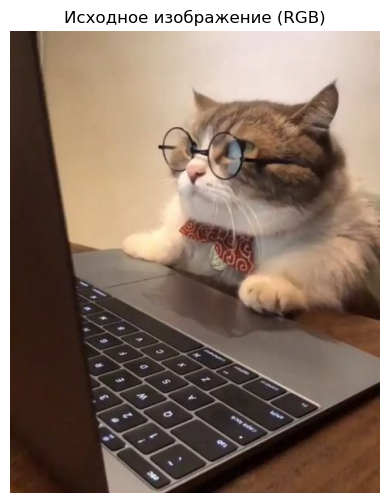

In [3]:
# Импорт необходимых библиотек
import cv2                             # Библиотека для обработки изображений
import numpy as np                     # Библиотека для работы с массивами и матрицами
import matplotlib.pyplot as plt        # Библиотека для построения графиков и отображения изображений

##############################################################################
# 1. Загрузка и отображение изображения
##############################################################################

# Путь к исходному изображению
image_path = 'image.jpg'
img = cv2.imread(image_path)

# Проверка успешности загрузки изображения
if img is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по пути: {image_path}")

# OpenCV загружает изображение в формате BGR,
# поэтому преобразуем его в RGB для корректного отображения с matplotlib.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Отображение исходного цветного изображения
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Исходное изображение (RGB)")
plt.axis('off')
plt.show()


#### Выводы и наблюдения для этапа 1: Исходное изображение (RGB)

1. **Цветовая информация**: 
   - Исходное изображение представлено в цветовой модели RGB.
   - Хорошая детализация и передача оттенков.

2. **Объекты на изображении**:
   - Четко различимые элементы: ноутбук, кот в очках, фон.
   - Присутствуют различные цветовые контрасты.

3. **Качество изображения**:
   - Высокая четкость и резкость, что полезно для дальнейшей обработки.
   - Нет значительных шумов я проведу анализ.

### 2. Преобразование цветовых пространств

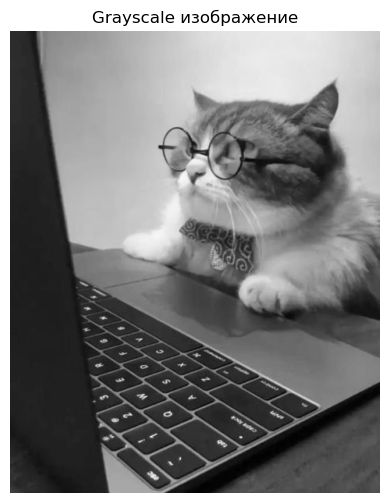

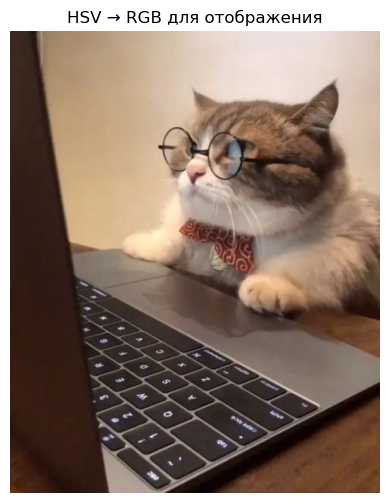

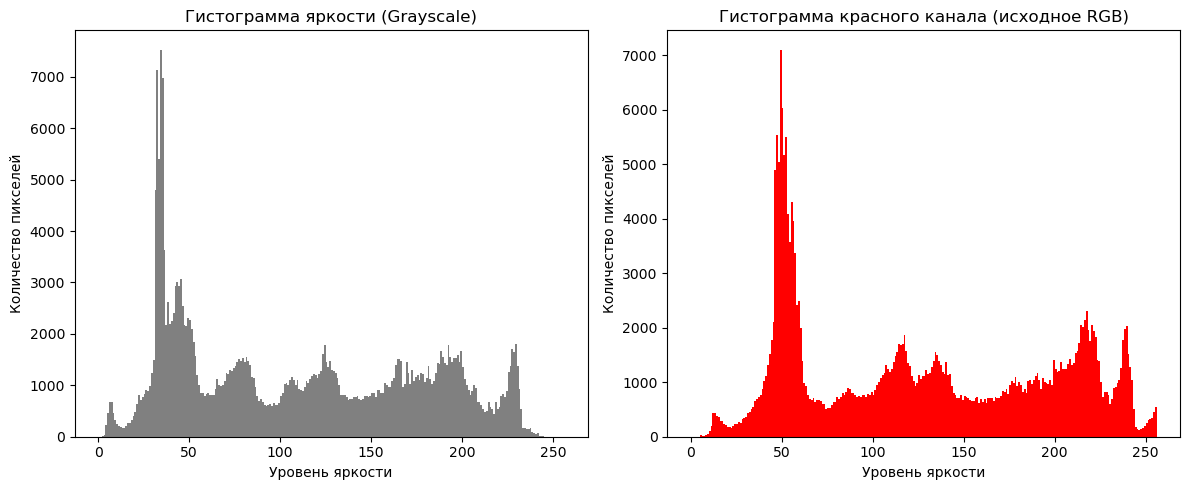

In [4]:
##############################################################################
# 2. Преобразование цветовых пространств
##############################################################################

# Преобразуем изображение в Grayscale (оттенки серого)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Преобразуем изображение в HSV (Hue, Saturation, Value)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Для отображения HSV изображения в matplotlib, преобразуем его обратно в RGB
img_hsv_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# Отображение Grayscale изображения
plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale изображение")
plt.axis('off')
plt.show()

# Отображение HSV изображения (конвертированного в RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img_hsv_rgb)
plt.title("HSV → RGB для отображения")
plt.axis('off')
plt.show()

##############################################################################
# 2.1 Построение гистограмм яркости
##############################################################################

plt.figure(figsize=(12, 5))

# Гистограмма яркости для исходного изображения (в Grayscale)
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Гистограмма яркости (Grayscale)")
plt.xlabel("Уровень яркости")
plt.ylabel("Количество пикселей")

# Сравниваем с гистограммой, построенной по одному из цветовых каналов исходного изображения в RGB
# Здесь для примера взят красный канал.
red_channel = img_rgb[:, :, 0]
plt.subplot(1, 2, 2)
plt.hist(red_channel.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Гистограмма красного канала (исходное RGB)")
plt.xlabel("Уровень яркости")
plt.ylabel("Количество пикселей")

plt.tight_layout()
plt.show()

#### Выводы и наблюдения для этапа 2: 

**Преобразование в Grayscale**

1. **Потеря цветовой информации**: 
   - Преобразование в градации серого убирает цветовую информацию, оставляя только интенсивность яркости.
   - Теперь объект выделяется только за счет яркости пикселей.

2. **Контраст и детализация**:
   - Хорошая передача контрастов между объектами.
   - Очки, мех и ноутбук остаются четко различимыми.

3. **Применимость для дальнейшей обработки**:
   - Упрощает анализ изображения для фильтрации, выделения краев и морфологических операций.
   - Готово к построению гистограммы яркости.


**Преобразование в HSV и обратное отображение в RGB**

1. **Разделение цветовых характеристик**:
   - Преобразование в HSV (Hue, Saturation, Value) позволяет разделить цветовой тон, насыщенность и яркость.
   - Это полезно для обработки цвета, например, изменения оттенков или регулировки насыщенности.

2. **Возвращение в RGB**:
   - После конвертации обратно в RGB визуально изображение практически не изменилось.
   - Это подтверждает, что HSV можно использовать для цветокоррекции без значительных потерь.

3. **Применимость**:
   - Удобно использовать для выделения определенных цветов или устранения влияния освещения.
   - Следующий шаг — построение гистограмм яркости для анализа распределения яркостных значений.


**Гистограммы яркости**

1. **Гистограмма Grayscale**:
   - Отражает распределение яркостных значений по всему изображению.
   - Наблюдаются несколько пиков, что свидетельствует о наличии как темных, так и светлых областей.
   - Наиболее выраженный пик в районе низких значений яркости (около 50), что указывает на преобладание темных оттенков.

2. **Гистограмма красного канала (RGB)**:
   - Показывает, как распределены значения яркости в красном компоненте изображения.
   - Форма гистограммы похожа на Grayscale, но варьируется за счет цветовой информации.
   - Высокий пик в области низких значений свидетельствует о наличии множества темных оттенков в красном канале.

3. **Применимость**:
   - Анализ гистограммы помогает понять распределение освещенности и контраста на изображении.
   - Можно использовать для улучшения контраста, например, с помощью гистограммного выравнивания.

### 3. Фильтрация изображений

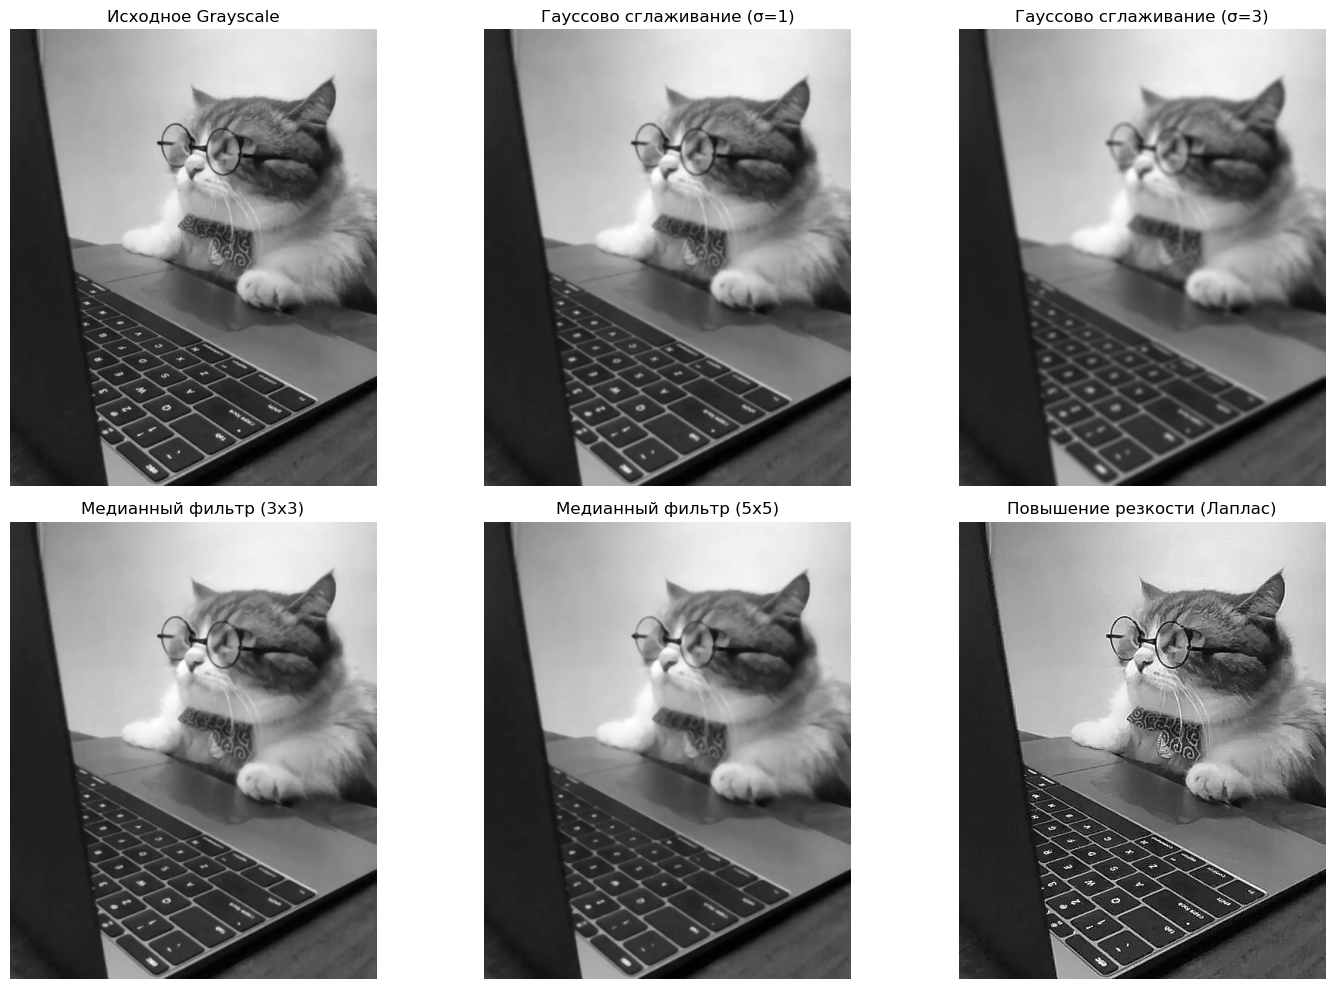

In [6]:
##############################################################################
# 3. Фильтрация изображений
##############################################################################

# --- 3.1 Гауссово сглаживание с разными значениями σ ---

gaussian_1 = cv2.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=1)  # σ=1
gaussian_3 = cv2.GaussianBlur(img_gray, ksize=(7, 7), sigmaX=3)  # σ=3

# --- 3.2 Медианный фильтр с разными размерами ядра ---

median_3 = cv2.medianBlur(img_gray, ksize=3)   # ядро 3x3
median_5 = cv2.medianBlur(img_gray, ksize=5)   # ядро 5x5

# --- 3.3 Фильтр Лапласа для повышения резкости ---
# Вычисляем Лапласиан (в 64-битном формате)
laplacian = cv2.Laplacian(img_gray, ddepth=cv2.CV_64F)
# Для удобства превращаем в 8-битный формат и одновременно используем результат, вычтя его из исходного
sharp = cv2.convertScaleAbs(img_gray - laplacian)

# Отображение результатов фильтрации
plt.figure(figsize=(15, 10))

# Оригинальное Grayscale изображение
plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Исходное Grayscale")
plt.axis('off')

# Гауссово сглаживание (σ=1)
plt.subplot(2, 3, 2)
plt.imshow(gaussian_1, cmap='gray')
plt.title("Гауссово сглаживание (σ=1)")
plt.axis('off')

# Гауссово сглаживание (σ=3)
plt.subplot(2, 3, 3)
plt.imshow(gaussian_3, cmap='gray')
plt.title("Гауссово сглаживание (σ=3)")
plt.axis('off')

# Медианный фильтр (3x3)
plt.subplot(2, 3, 4)
plt.imshow(median_3, cmap='gray')
plt.title("Медианный фильтр (3x3)")
plt.axis('off')

# Медианный фильтр (5x5)
plt.subplot(2, 3, 5)
plt.imshow(median_5, cmap='gray')
plt.title("Медианный фильтр (5x5)")
plt.axis('off')

# Повышение резкости (Лаплас)
plt.subplot(2, 3, 6)
plt.imshow(sharp, cmap='gray')
plt.title("Повышение резкости (Лаплас)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Выводы и наблюдения для этапа 3: Фильтрация изображений

1. **Гауссово сглаживание (σ=1, σ=3)**:
   - Уменьшает шум, сохраняя основные контуры изображения.
   - При увеличении значения σ (размытия) детали становятся менее четкими.
   - σ=1 немного сглаживает изображение, а при σ=3 оно становится более размытым.

2. **Медианный фильтр (3×3, 5×5)**:
   - Эффективно удаляет шум, сохраняя резкие границы объектов.
   - Более мягкое размытие по сравнению с Гауссовым фильтром.
   - Фильтр 5×5 сглаживает изображение сильнее, чем 3×3.

3. **Фильтр Лапласа (повышение резкости)**:
   - Усиливает контуры изображения, делая их более выразительными.
   - Может усилить шум, но улучшает детализацию.
   - Хорошо выделяет границы объектов (например, контуры кота и ноутбука).

#### Применимость:
- **Гауссов фильтр** — полезен для подавления случайных шумов.
- **Медианный фильтр** — хорошо подходит для удаления соляно-перцового шума.
- **Лапласиан** — применяется для повышения резкости, но может усиливать шум.

### 4. Выделение краёв и углов

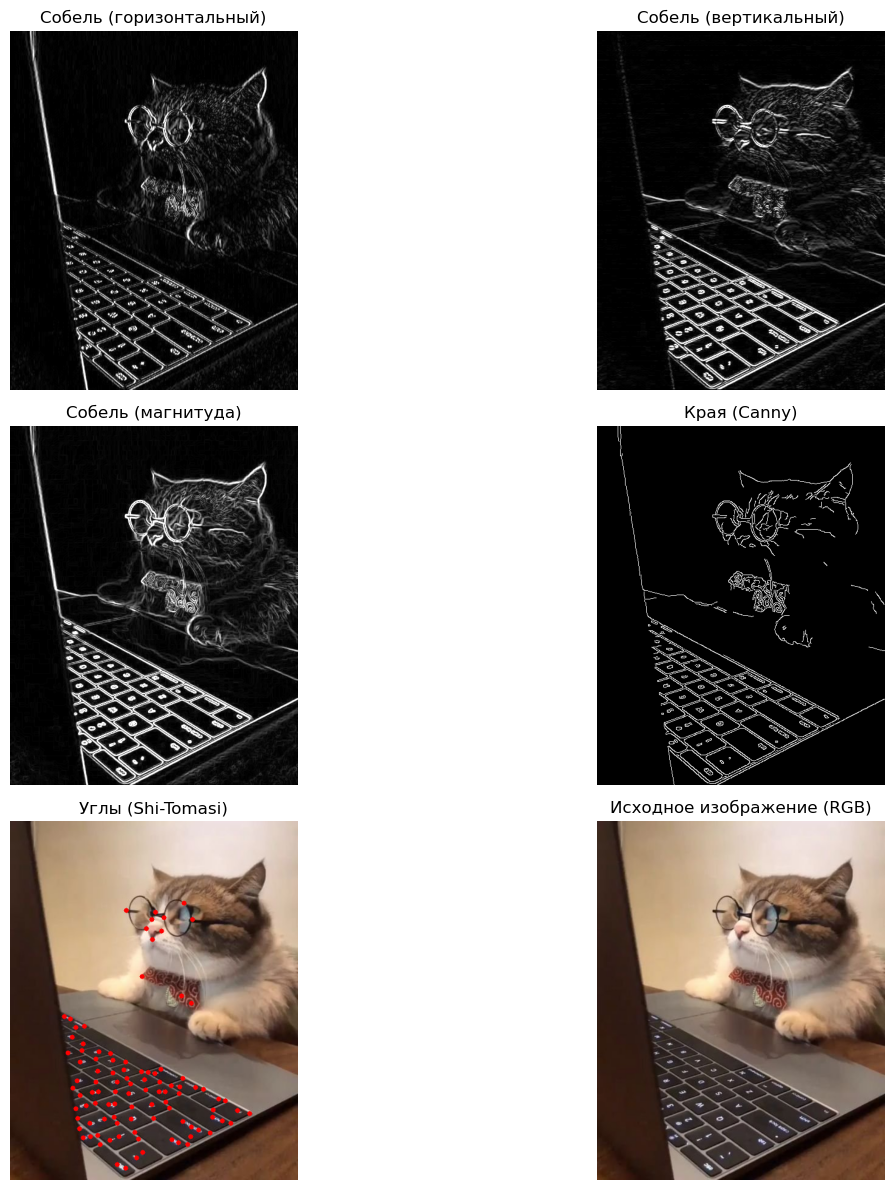

In [8]:
##############################################################################
# 4. Выделение краёв и углов
##############################################################################

# --- 4.1 Оператор Собеля (горизонтальные и вертикальные градиенты) ---
sobel_x = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# --- 4.2 Алгоритм Кэнни для обнаружения краев ---
edges_canny = cv2.Canny(img_gray, threshold1=100, threshold2=200)

# --- 4.3 Детектор углов (Shi-Tomasi) ---
max_corners = 100
# Возвращает массив координат с плавающей точкой
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=max_corners, 
                                  qualityLevel=0.01, minDistance=10)
# Преобразуем координаты углов в целочисленный формат, избегая устаревшего np.int0
if corners is not None:
    corners = corners.astype(int)

# Создаём копию исходного изображения (BGR) для наложения углов
img_corners = img.copy()
if corners is not None:
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img_corners, (x, y), radius=4, color=(0, 0, 255), thickness=-1)

# Для отображения в matplotlib переводим BGR → RGB
img_corners_rgb = cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB)
img_original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Отображение результатов выделения краёв и углов
plt.figure(figsize=(15, 12))

# Собель: Горизонтальный градиент
plt.subplot(3, 2, 1)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title("Собель (горизонтальный)")
plt.axis('off')

# Собель: Вертикальный градиент
plt.subplot(3, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title("Собель (вертикальный)")
plt.axis('off')

# Собель: Магнитуда градиента
plt.subplot(3, 2, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Собель (магнитуда)")
plt.axis('off')

# Кэнни
plt.subplot(3, 2, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title("Края (Canny)")
plt.axis('off')

# Углы (Shi-Tomasi), наложенные на исходное изображение
plt.subplot(3, 2, 5)
plt.imshow(img_corners_rgb)
plt.title("Углы (Shi-Tomasi)")
plt.axis('off')

# Исходное изображение для сравнения
plt.subplot(3, 2, 6)
plt.imshow(img_original_rgb)
plt.title("Исходное изображение (RGB)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Выводы и наблюдения для этапа 4: Выделение краёв и углов

1. **Оператор Собеля (горизонтальный, вертикальный, величина градиента)**:
   - Горизонтальный фильтр выделяет границы, ориентированные по вертикали (например, края ноутбука).
   - Вертикальный фильтр выявляет горизонтальные границы (например, линии клавиатуры).
   - Магнитуда градиента объединяет оба направления и показывает общие контуры объектов.

2. **Оператор Кэнни (Canny)**:
   - Дает четкие, тонкие границы.
   - Хорошо определяет контуры объектов, таких как кот, очки и ноутбук.
   - Подходит для задач, требующих четкого выделения границ.

3. **Детектор углов Shi-Tomasi**:
   - На изображении выделены угловые точки (красные точки).
   - Хорошо обнаруживает углы на клавиатуре и на очках кота.
   - Полезен для задач компьютерного зрения, таких как отслеживание объектов.

#### Применимость:
- **Оператор Собеля** — для анализа градиентов и усиления границ.
- **Кэнни** — для точного выделения краев, подходит для сегментации.
- **Shi-Tomasi** — используется в отслеживании объектов и распознавании форм.

### 5. Морфологические операции

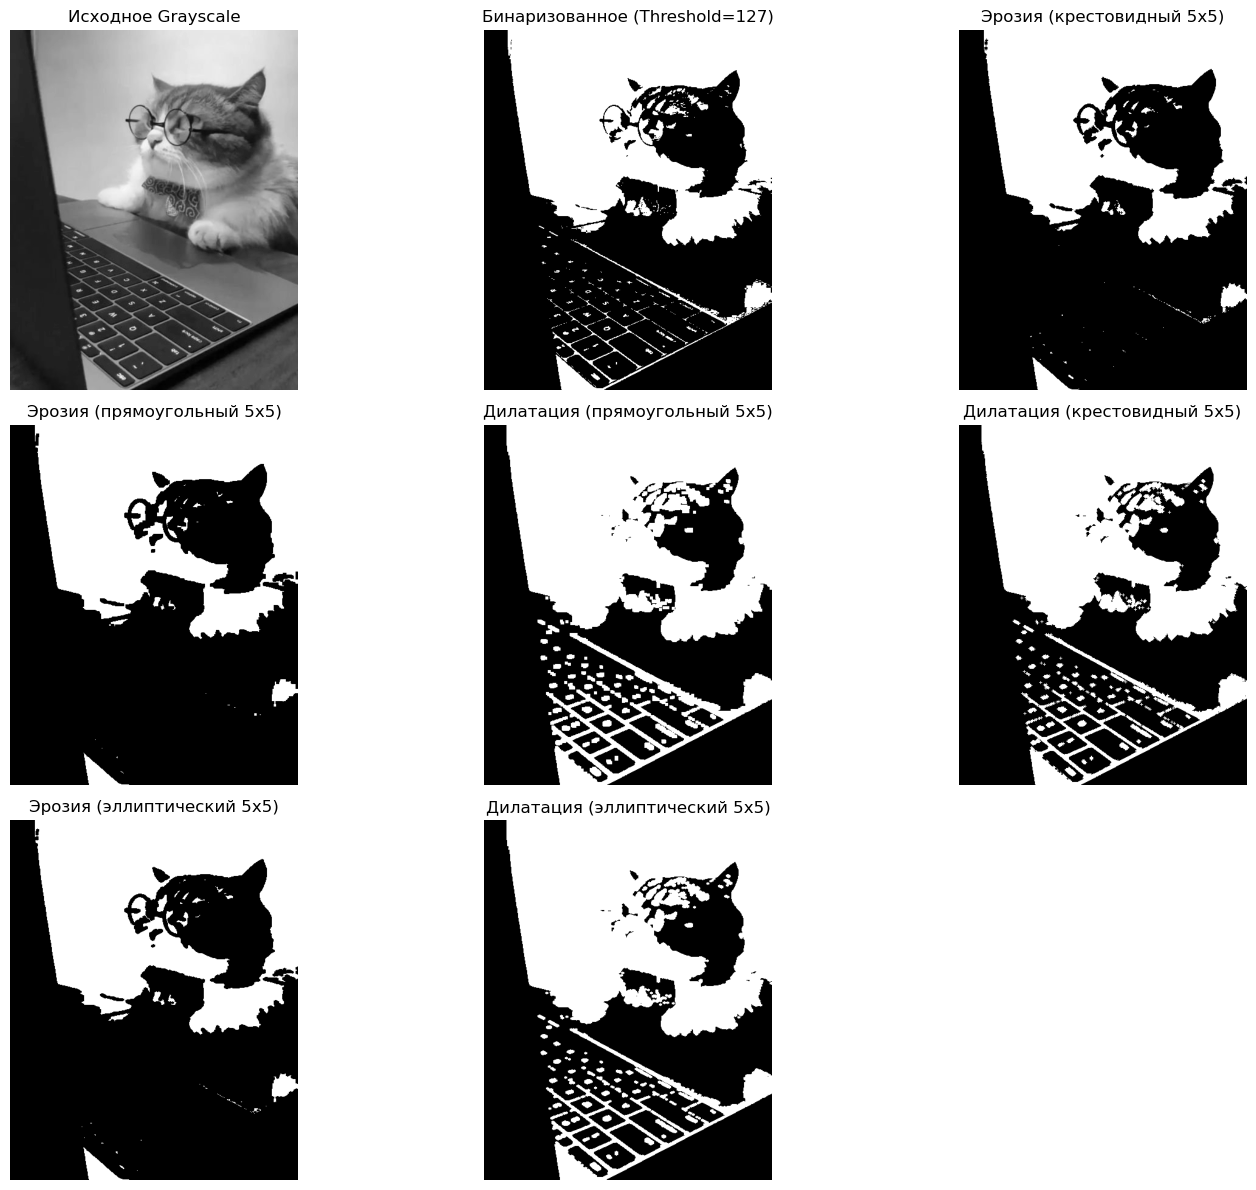

In [10]:
##############################################################################
# 5. Морфологические операции
##############################################################################

# 5.1 Бинаризация (пороговая сегментация)
ret, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# 5.2 Определяем структурные элементы разных форм и размеров
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# 5.3 Эрозия и дилатация
eroded_rect = cv2.erode(img_binary, kernel_rect, iterations=1)
dilated_rect = cv2.dilate(img_binary, kernel_rect, iterations=1)

eroded_ellipse = cv2.erode(img_binary, kernel_ellipse, iterations=1)
dilated_ellipse = cv2.dilate(img_binary, kernel_ellipse, iterations=1)

eroded_cross = cv2.erode(img_binary, kernel_cross, iterations=1)
dilated_cross = cv2.dilate(img_binary, kernel_cross, iterations=1)

# 5.4 Отображение результатов морфологических операций
plt.figure(figsize=(15, 12))

# Исходное Grayscale
plt.subplot(3, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Исходное Grayscale")
plt.axis('off')

# Бинаризованное изображение
plt.subplot(3, 3, 2)
plt.imshow(img_binary, cmap='gray')
plt.title("Бинаризованное (Threshold=127)")
plt.axis('off')

# Эрозия (прямоугольный элемент)
plt.subplot(3, 3, 4)
plt.imshow(eroded_rect, cmap='gray')
plt.title("Эрозия (прямоугольный 5x5)")
plt.axis('off')

# Дилатация (прямоугольный элемент)
plt.subplot(3, 3, 5)
plt.imshow(dilated_rect, cmap='gray')
plt.title("Дилатация (прямоугольный 5x5)")
plt.axis('off')

# Эрозия (эллиптический элемент)
plt.subplot(3, 3, 7)
plt.imshow(eroded_ellipse, cmap='gray')
plt.title("Эрозия (эллиптический 5x5)")
plt.axis('off')

# Дилатация (эллиптический элемент)
plt.subplot(3, 3, 8)
plt.imshow(dilated_ellipse, cmap='gray')
plt.title("Дилатация (эллиптический 5x5)")
plt.axis('off')

# Эрозия (крестовидный элемент)
plt.subplot(3, 3, 3)
plt.imshow(eroded_cross, cmap='gray')
plt.title("Эрозия (крестовидный 5x5)")
plt.axis('off')

# Дилатация (крестовидный элемент)
plt.subplot(3, 3, 6)
plt.imshow(dilated_cross, cmap='gray')
plt.title("Дилатация (крестовидный 5x5)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Выводы и наблюдения для этапа 5: Морфологические операции (эрозия, дилатация, бинаризация)

1. **Бинаризация (Threshold = 127)**:
   - Изображение преобразовано в черно-белое по порогу яркости.
   - Объекты четко отделены от фона.
   - Полезно для сегментации и последующих морфологических операций.

2. **Эрозия**:
   - Уменьшает размер белых областей, размывая границы.
   - Использование различных структурных элементов (прямоугольный, крестовидный, эллиптический) дает разные результаты.
   - Крестовидный элемент сильнее стирает узкие линии.

3. **Дилатация**:
   - Увеличивает размер белых областей, расширяя границы объектов.
   - Позволяет устранить мелкие разрывы в бинаризованном изображении.
   - Прямоугольный элемент расширяет равномерно, эллиптический — более сглаженно.

#### Применимость:
- **Бинаризация** — для подготовки изображения к анализу объектов.
- **Эрозия** — полезна для удаления шумов и уменьшения мелких деталей.
- **Дилатация** — помогает восстановить потерянные границы и усилить объекты.

### Вывод

Мы выполнили основные этапы обработки изображений, включая загрузку, преобразование цветовых пространств, фильтрацию, выделение границ и морфологические операции. Эти методы являются ключевыми инструментами компьютерного зрения и широко применяются в задачах анализа изображений, распознавания объектов и машинного обучения.

- **Преобразование цветовых пространств** позволяет адаптировать изображение для различных типов анализа, например, выделять оттенки или работать только с яркостью.
- **Фильтрация** помогает улучшить качество изображения, устраняя шумы и подчеркивая важные детали.
- **Выделение краев и углов** облегчает анализ структуры объектов, что важно для сегментации и детектирования объектов.
- **Морфологические операции** позволяют улучшить бинаризованные изображения, удаляя шум, заполняя разрывы и корректируя границы объектов.

Эти техники формируют основу множества сложных алгоритмов обработки изображений.